>  # **Natural Language Processing**





# **DADOS**
* A base de dados foi coletada a partir de palavras chaves do  Twitter.
* O dataset contém informações relacionadas ao Governo de Minas Gerais.
* A rotulagem desses tweets foi feita manualmente.

# **Importar bibliotecas**

In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk import tokenize, FreqDist

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Ferramenta NLTK**
* Recurso para processamento de textos
* Classificação de textos

Documentação = https://www.nltk.org

In [ ]:
nltk.download()
#d / all / q

# **Carregar dados**

In [ ]:
#Ler o arquivo de dados e exibe
df = pd.read_csv('/content/Tweets_Mg.csv')
df.head()

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Observação,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Exploração dos dados**

**A função df.count() retorna a  conta a quantidade de linhas**

In [ ]:
#Conta a quantidade de linhas do dataset
df.count()

Unnamed: 0                   8199
Created At                   8199
Text                         8199
Geo Coordinates.latitude      104
Geo Coordinates.longitude     104
User Location                5489
Username                     8199
User Screen Name             8199
Retweet Count                8199
Classificacao                8199
Observação                      1
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

In [ ]:
#Conta a quantidade de linhas de tweets neutros, positivos e negativos
df['Classificacao'].value_counts()

Positivo    3300
Neutro      2453
Negativo    2446
Name: Classificacao, dtype: int64

**A função df.isnull().sum() retorna o número de valores ausentes no conjunto de dados**

In [ ]:
#Verificar se há algum valor ausente 
df['Classificacao'].isnull().sum()
df['Text'].isnull().sum()

0

##**Pré-processamento**
Técnicas de pré-processamento são aplicadas para formatar e estruturar os textos, sem remover suas características naturais

**A função df.drop ([ ], axis = 1, inplace = True)
remove permanentemente as colunas**

In [ ]:
df.drop(df.columns[[0, 1, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14,15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]], axis=1, inplace = True)

**Limpeza dos dados** 

In [ ]:
#Função para remover links, caracteres especiais, pontuações dos tweets
def Limpeza_dados(instancia):
    instancia = re.sub(r"http\S+", "", instancia).replace('.','').replace(';','').replace('-','').replace(':','').replace(')','').replace('!','').replace('@','').replace('%','').replace('#','').replace('?','').replace('"','')
    return (instancia)
#Aplicar a função no dataset
df['Text']=df['Text'].apply(Limpeza_dados)

**Stopwords: são palavras utilizadas com muita frequência, devido a isso não têm potencial para contribuir para a caracterização do conteúdo presente no texto.**

In [ ]:
#Exibe as stopwords da nltk
stop= setstopwords = set(nltk.corpus.stopwords.words('portuguese'))
print(stop) 

{'da', 'mas', 'fui', 'está', 'das', 'eram', 'um', 'também', 'será', 'mais', 'estejam', 'seu', 'entre', 'estivera', 'seja', 'hajam', 'vocês', 'essa', 'houvera', 'se', 'minhas', 'estava', 'depois', 'num', 'hão', 'tu', 'esteja', 'houveram', 'aquela', 'me', 'até', 'terá', 'houve', 'só', 'estivemos', 'serei', 'houveriam', 'aquele', 'há', 'era', 'meu', 'ao', 'foi', 'fôssemos', 'tivera', 'pelos', 'dela', 'são', 'as', 'ele', 'de', 'não', 'sou', 'aquilo', 'teremos', 'quando', 'que', 'lhes', 'estivessem', 'tive', 'tiver', 'para', 'tenha', 'eles', 'houverei', 'estivermos', 'aquelas', 'tuas', 'estou', 'estejamos', 'fossem', 'pela', 'lhe', 'estiveram', 'isto', 'nossas', 'estávamos', 'terão', 'houvesse', 'nem', 'estiverem', 'nós', 'este', 'suas', 'éramos', 'mesmo', 'seríamos', 'houvemos', 'tivéssemos', 'delas', 'tivessem', 'deles', 'tivemos', 'houver', 'teriam', 'houverem', 'uma', 'estive', 'esteve', 'estivéramos', 'aos', 'serão', 'houverão', 'houverá', 'nos', 'teria', 'no', 'pelo', 'elas', 'ela', '

In [ ]:
#Função para remover stopwords
def RemoveStopWords(instancia):
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))
#Aplicar a função no dataset
df['Text']=df['Text'].apply(RemoveStopWords)

**Remover emojis**

In [ ]:
#Função para remover emojis 
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
#Aplicar a função no dataset
df['Text']=df['Text'].apply(remove_emoji)

**Visualizar os dados após o pré-processamento**

In [ ]:
#Exibe as 20 primeiras linhas
df.head(20)

,Text,Classificacao
0,Catedral Santo Antônio Governador Valadares/MG,Neutro
1,"Governador Valadares, Minas Gerais",Neutro
2,"Governador Valadares, Minas Gerais",Neutro
3,,Neutro
4,PSOL vai questionar aumento vereadores prefei...,Negativo
5,bom bandido morto Deputado Cabo Júlio condenad...,Neutro
6,"E 25 mineiros dizem torcer time nenhum,mesmo d...",Neutro
7,A gigantesca barba mal destaque caderno Cultur...,Neutro
8,BB governo Minas travam disputa sobre depósito...,Negativo
9,vcs bh fica pequena Belo Horizonte (pron [bɛlo...,Neutro


#**Feature Engineering**
Depois de "ajeitar" as palavras do texto a serem consideradas, precisamos pensar em como vamos expressar quando elas aparecem em um vetor

**Frequência das palavras: é a quantidade de vezes que uma palavra apareceu no texto**

In [ ]:
todas_palavras = ' '.join([texto for texto in df["Text"]])
# Tokenizar para verificar a frequência de cada palavra
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                              "Frequência": list(frequencia.values())})
# 20 Palavras mais comuns na base de dados
df_frequencia.sort_values(by='Frequência', inplace=True, ascending=False)
df_frequencia.head(20)

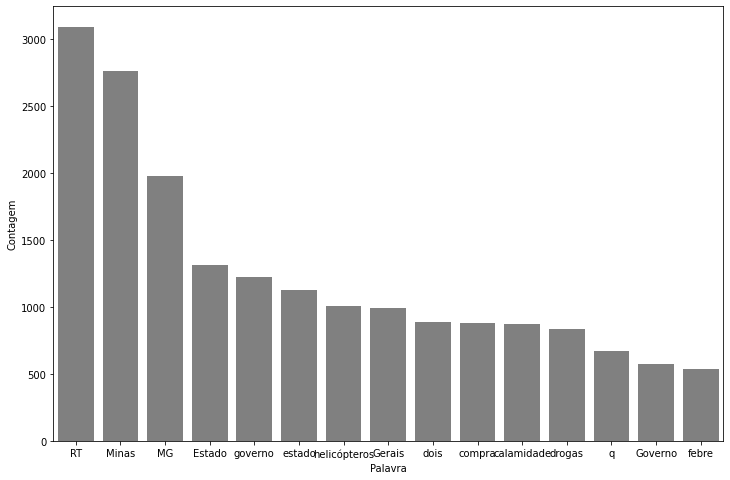

In [ ]:
#Plotar as palavras mais comuns da base de dados
plt.figure(figsize=(12,8))
ax = sns.barplot(data = df_frequencia.head(15), x = "Palavra", y = "Frequência", color = 'gray')
ax.set(ylabel = "Contagem")
plt.show()

**Bag of words(saco de palavras): é a representação simplificada usada no processo de linguagem natural e recuperação de informações**

In [ ]:
def nuvem_palavras(texto, coluna_texto,sentimento):
    # Separar nuvem por sentimento
    texto = texto.query(f"Classificacao == '{sentimento}'")
    # Juntando todos os textos na mesma string
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    # Gerando a nuvem de palavras
    nuvem_palvras = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(todas_palavras)
    # Plotando nuvem de palavras
    plt.figure(figsize=(24,12))
    plt.imshow(nuvem_palvras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

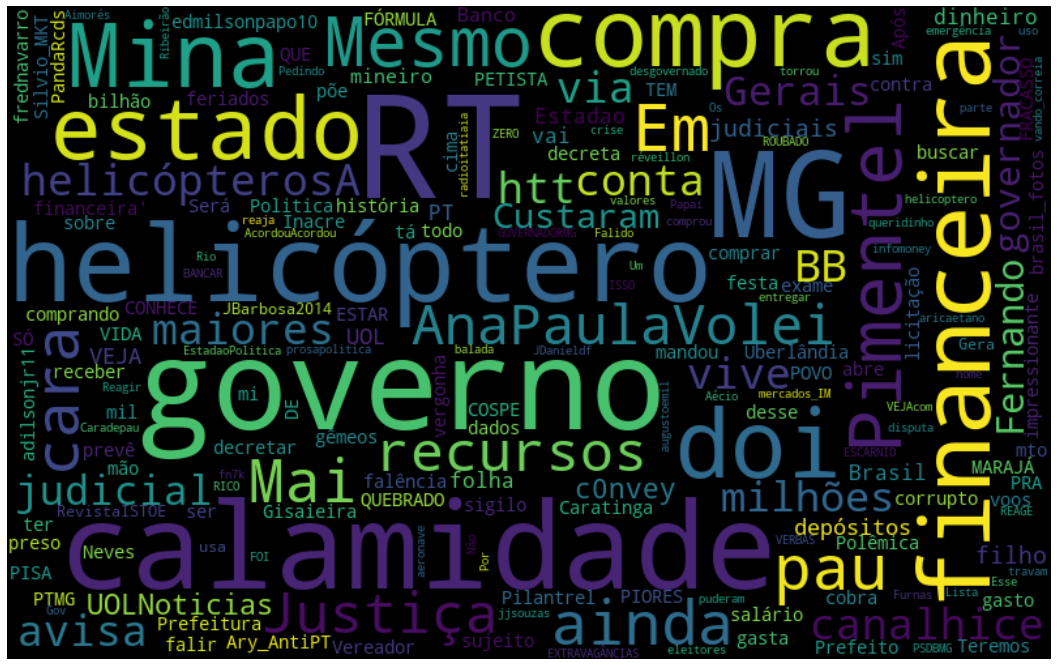

In [ ]:
#Exibe a nuvem de palavras da classificação negativa
nuvem_palavras(df, "Text", "Negativo")

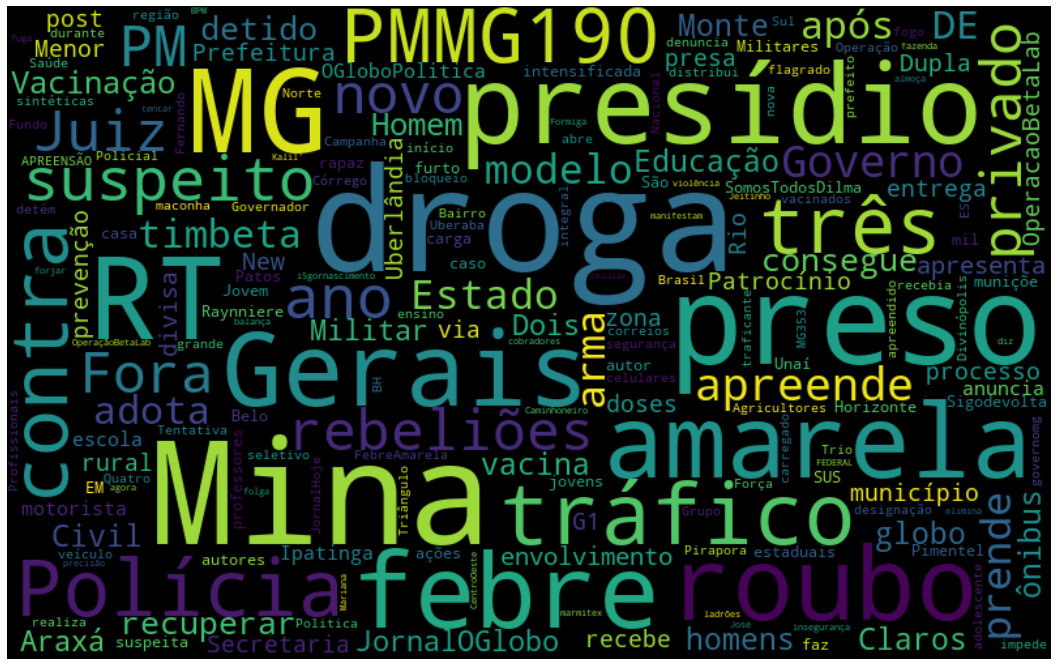

In [ ]:
#Exibe a nuvem de palavras da classificação positiva
nuvem_palavras(df, "Text", "Positivo")

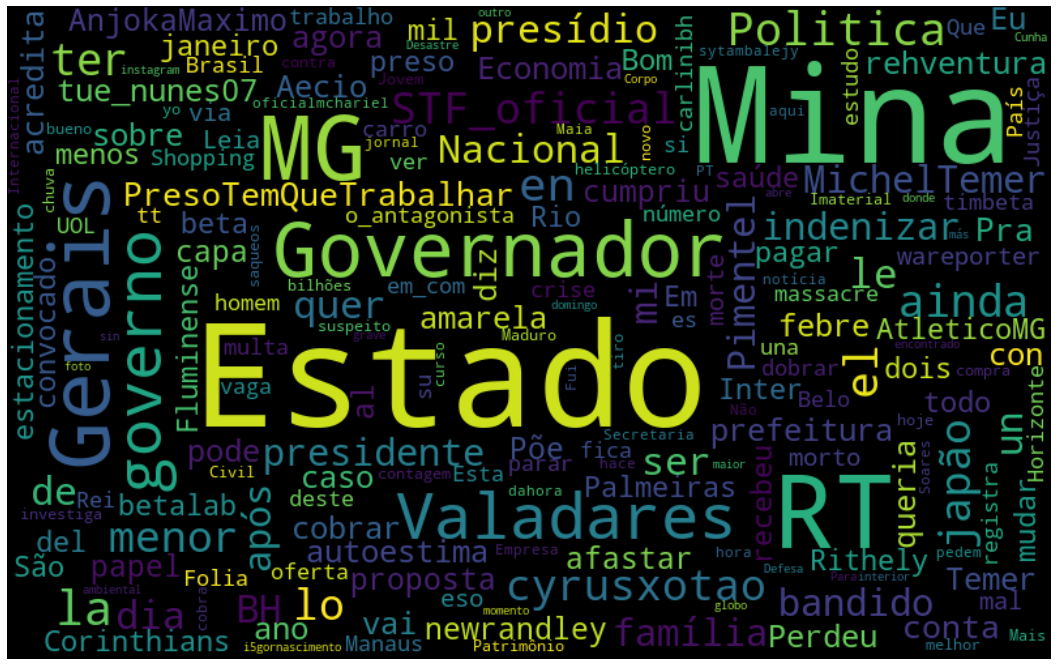

In [ ]:
#Exibe a nuvem de palavras da classificação neutra
nuvem_palavras(df, "Text", "Neutro")

# **Conclusão**
Nesta documentação foram utilizadas técnicas de Natural Language Processing em um dataset de tweets sobre o governo de Minas Gerais.

**Trabalhos futuros**

Que tipo de tarefa de Machine Learning você aplicaria entre classificação ou agrupamento e
que situação do contexto dos dados seria resolvida com o modelo resultante dessa escolha? Classificação, a fim de analisar a polaridade (positivo, negativo e neutro) de sentimentos presentes nos tweets.